# Comparison of different reference databases

In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from util import *

# set path to data folder
root = "F:/Studium/Master/semester5/thesis/data/dataset/"

# definition of the true positive species
species = {
    "Pseudomonas aeruginosa",
    "Escherichia coli",
    "Salmonella enterica",
    "Staphylococcus aureus",
    "Limosilactobacillus fermentum",
    "Enterococcus faecalis",
    "Listeria monocytogenes",
    "Bacillus subtilis",
    "Saccharomyces cerevisiae",
    "Cryptococcus neoformans"}

# total read count in zymoMock dataset
total = 1_160_526
# reading the taxonomic tree
tree = Tree(root + "tree_nr.txt")
# generate dictionary with all taxa that are true positives for each taxonomic rank
true_taxons = get_true_taxons_for_all_ranks(tree, species)

In [2]:
# reading in datasets
data_nr50 = read_per_taxon_assignment(root + "zymo_mock/assignment_nr50_uniform11s_13-mer/per_taxon_assignments.tsv", kmer_threshold=1, ovo_1_threshold=1)
data_nr90 = read_per_taxon_assignment(root + "zymo_mock/assignment_nr90_uniform11s_13-mer/per_taxon_assignments.tsv", kmer_threshold=1, ovo_1_threshold=1)
data_nr = read_per_taxon_assignment(root + "zymo_mock/assignment_nr_uniform11s_13-mer/per_taxon_assignments.tsv", kmer_threshold=1, ovo_1_threshold=1)

# add column with labels for the true positives
data_nr50 = classify_assigned_taxa(data_nr50, true_taxons)
data_nr90 = classify_assigned_taxa(data_nr90, true_taxons)
data_nr = classify_assigned_taxa(data_nr, true_taxons)

# transform algorithm columns into one column with algorithm, parameter and used data
data_nr50 = extract_algorithm_info(data_nr50)
data_nr90 = extract_algorithm_info(data_nr90)
data_nr = extract_algorithm_info(data_nr)

# calculate the precision and recall for each algorithm-parameter-data combination and each rank
data_nr50 = get_precision_recall_reads(data_nr50, total)
data_nr90 = get_precision_recall_reads(data_nr90, total)
data_nr = get_precision_recall_reads(data_nr, total)

data_nr

true positive,algorithm,algorithm data,algorithm parameter,rank,false positive,true positive,precision,recall
2,OVA,kmer count,0.1,class,647.0,29819.0,0.978763,0.025694
4,OVA,kmer count,0.1,family,469.0,121077.0,0.996141,0.104329
7,OVA,kmer count,0.1,genus,3670.0,77995.0,0.955060,0.067207
11,OVA,kmer count,0.1,kingdom,27.0,37305.0,0.999277,0.032145
13,OVA,kmer count,0.1,order,348.0,11869.0,0.971515,0.010227
...,...,...,...,...,...,...,...,...
3092,OVO,norm. kmer count (cumulative),1.0,kingdom,37167.0,1090457.0,0.967040,0.939623
3094,OVO,norm. kmer count (cumulative),1.0,order,165208.0,922285.0,0.848084,0.794713
3096,OVO,norm. kmer count (cumulative),1.0,phylum,122071.0,1006023.0,0.891790,0.866868
3101,OVO,norm. kmer count (cumulative),1.0,species,191357.0,662167.0,0.775804,0.570575


In [3]:
data_nr50_filtered = data_nr50[(data_nr50["algorithm"] == "OVA") & (data_nr50["algorithm parameter"] == 1) & (data_nr50["algorithm data"] == "kmer count (cumulative)")]
data_nr90_filtered = data_nr90[(data_nr90["algorithm"] == "OVA") & (data_nr90["algorithm parameter"] == 1) & (data_nr90["algorithm data"] == "kmer count (cumulative)")]
data_nr_filtered = data_nr[(data_nr["algorithm"] == "OVA") & (data_nr["algorithm parameter"] == 1) & (data_nr["algorithm data"] == "kmer count (cumulative)")]
data_nr90_filtered

true positive,algorithm,algorithm data,algorithm parameter,rank,false positive,true positive,precision,recall
743,OVA,kmer count (cumulative),1.0,class,38888.0,1010465.0,0.962941,0.870696
745,OVA,kmer count (cumulative),1.0,family,40157.0,983306.0,0.960764,0.847293
748,OVA,kmer count (cumulative),1.0,genus,65534.0,850200.0,0.928436,0.732599
752,OVA,kmer count (cumulative),1.0,kingdom,10153.0,1082784.0,0.990710,0.933011
754,OVA,kmer count (cumulative),1.0,order,36730.0,997106.0,0.964472,0.859185
756,OVA,kmer count (cumulative),1.0,phylum,29486.0,1036141.0,0.972330,0.892820
761,OVA,kmer count (cumulative),1.0,species,124759.0,488088.0,0.796427,0.420575
776,OVA,kmer count (cumulative),1.0,superkingdom,711.0,1118860.0,0.999365,0.964097


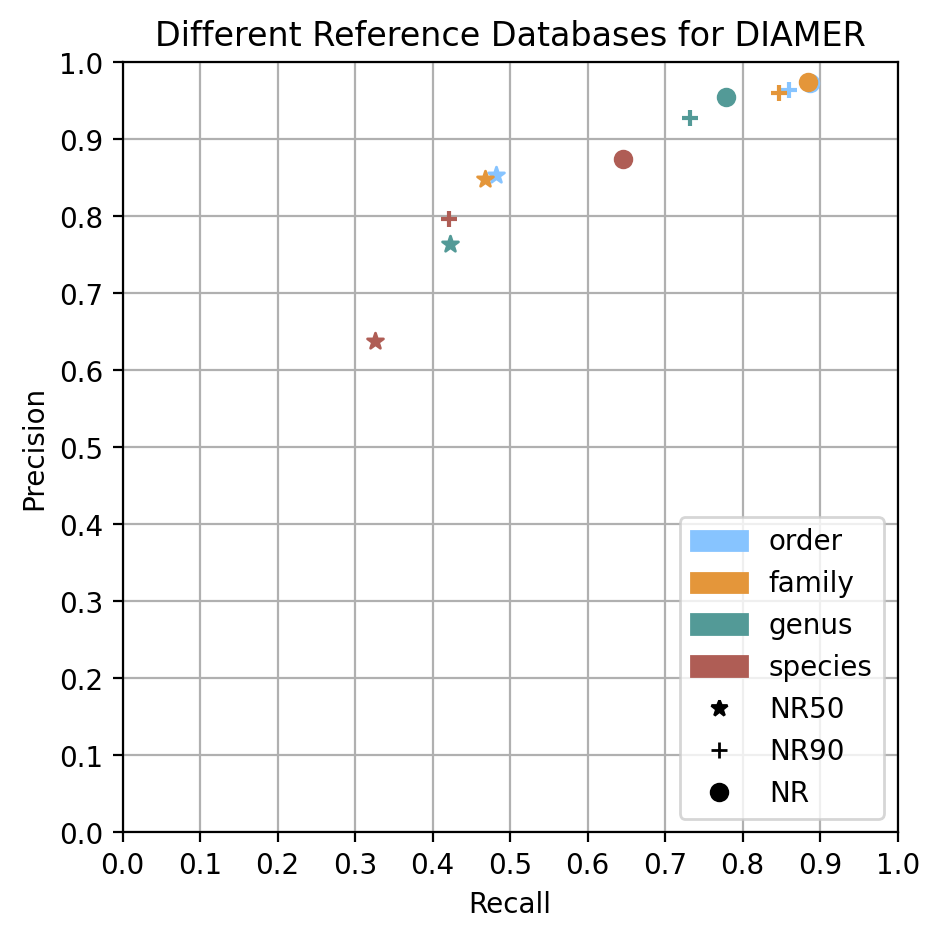

In [11]:
ranks = ["order", "family", "genus", "species"]
colors = ["#87c4ff", "#e4963a", "#539a97", "#af5d55"]

plt.figure(figsize=(5, 5), dpi=200)
plt.gca().set_axisbelow(True)

for rank, color in zip(ranks, colors):
    data_filtered = data_nr50_filtered[data_nr50_filtered["rank"] == rank]
    plt.scatter(
        data_filtered["recall"],
        data_filtered["precision"],
        color=color,
        marker="*"
    )
for rank, color in zip(ranks, colors):
    data_filtered = data_nr90_filtered[data_nr90_filtered["rank"] == rank]
    plt.scatter(
        data_filtered["recall"],
        data_filtered["precision"],
        color=color,
        marker="+"
    )
for rank, color in zip(ranks, colors):
    data_filtered = data_nr_filtered[data_nr_filtered["rank"] == rank]
    plt.scatter(
        data_filtered["recall"],
        data_filtered["precision"],
        color=color,
        marker="o"
    )

# legend
color_handles = []
for rank, color in zip(ranks, colors):
    color_handles.append(Patch(color=color, label=rank))
marker_handles = [
    Line2D([], [], marker="*", color="black", label="NR50", linestyle="None"),
    Line2D([], [], marker="+", color="black", label="NR90", linestyle="None"),
    Line2D([], [], marker="o", color="black", label="NR", linestyle="None")
]

plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Different Reference Databases for DIAMER")
plt.legend(handles=color_handles + marker_handles, loc="lower right")
plt.grid()
plt.show()